### CIFAR-10 and CIFAR-100 Image Classification Datasets

CIFAR-10: https://www.cs.toronto.edu/~kriz/cifar.html
- CIFAR-10 contains 60000 images of 32x32 pixels in 3 channels divided by 10 classes.
- Each class contains 6000 images

### Import the libraries we'll use

In [2]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#plots
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

#tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from tensorflow.keras.layers import BatchNormalization
from keras import metrics
from keras import utils

!pip install visualkeras
import visualkeras
from tensorflow.keras.utils import plot_model

%matplotlib inline

#Import CIFAR-10, CIFAR-100 Classification
from keras.datasets import cifar10, cifar100

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 15.5 MB/s eta 0:00:00


### Check Runtime Resources





In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Apr  2 20:51:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


### CIFAR-10: Import and pre-process data

In [5]:
# load training and testing datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # or cifar100.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [6]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [7]:
# Pixel values range from 0 to 255. To normalize the data, just divide all values by 255.
x_train = x_train / 255
x_test = x_test / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
# The label for X_train[0] is in Y_train[0].
y_train = y_train.flatten()
y_test = y_test.flatten()

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(x_train.shape[0])
shuffled_indices = np.random.permutation(indices)
x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]

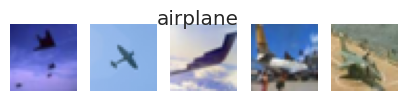

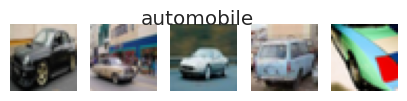

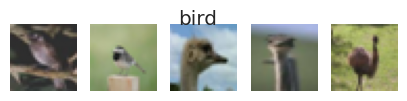

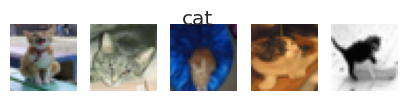

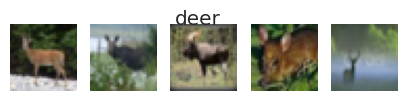

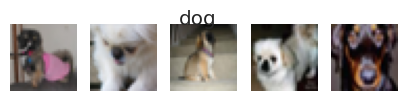

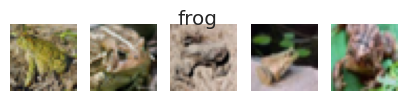

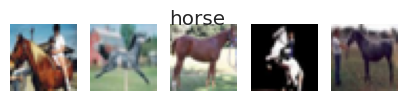

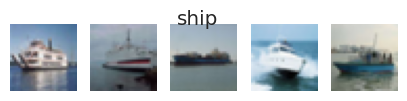

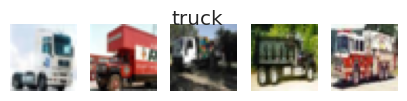

In [8]:
for i in range(len(label_names)):
    # Get the first 5 images of the class
    images = x_train[y_train == i][:5]
    # Plot the images
    fig, axs = plt.subplots(1, 5, figsize=(5,1))
    fig.suptitle(label_names[i])
    for j in range(5):
        axs[j].imshow(images[j])
        axs[j].axis('off')
    # Loop thru printing out plots
    plt.show()

#### Placeholder: Model Building Function
Create a placeholder function for building a neural net

In [9]:
def build_model(n_classes,
                hidden_layer_sizes=[256, 128, 64],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  # YOUR CODE HERE
  model = keras.Sequential()
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [10]:
model = build_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[256, 128])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=10,
  batch_size=64,
  validation_split=0.1,
  verbose=1)

history = pd.DataFrame(history.history)
display(history)
print(model.summary())

Epoch 1/10
704/704 [==============================] - 10s 5ms/step - loss: 1.8850 - accuracy: 0.3242 - val_loss: 1.7537 - val_accuracy: 0.3680
Epoch 2/10
704/704 [==============================] - 3s 5ms/step - loss: 1.6944 - accuracy: 0.3919 - val_loss: 1.7254 - val_accuracy: 0.3752
Epoch 3/10
704/704 [==============================] - 3s 4ms/step - loss: 1.6135 - accuracy: 0.4270 - val_loss: 1.6093 - val_accuracy: 0.4284
Epoch 4/10
704/704 [==============================] - 2s 3ms/step - loss: 1.5594 - accuracy: 0.4414 - val_loss: 1.5899 - val_accuracy: 0.4320
Epoch 5/10
704/704 [==============================] - 2s 3ms/step - loss: 1.5112 - accuracy: 0.4581 - val_loss: 1.5330 - val_accuracy: 0.4578
Epoch 6/10
704/704 [==============================] - 2s 3ms/step - loss: 1.4800 - accuracy: 0.4710 - val_loss: 1.5262 - val_accuracy: 0.4554
Epoch 7/10
704/704 [==============================] - 2s 3ms/step - loss: 1.4565 - accuracy: 0.4795 - val_loss: 1.5239 - val_accuracy: 0.4626
Epoch

,loss,accuracy,val_loss,val_accuracy
0,1.885037,0.324222,1.753660,0.3680
1,1.694411,0.391933,1.725372,0.3752
2,1.613516,0.427000,1.609347,0.4284
3,1.559409,0.441444,1.589888,0.4320
4,1.511156,0.458111,1.533035,0.4578
5,1.480048,0.471000,1.526242,0.4554
6,1.456490,0.479467,1.523944,0.4626
7,1.426933,0.490511,1.537215,0.4582
8,1.413642,0.494822,1.528936,0.4650
9,1.393406,0.502333,1.500117,0.4782


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________
None


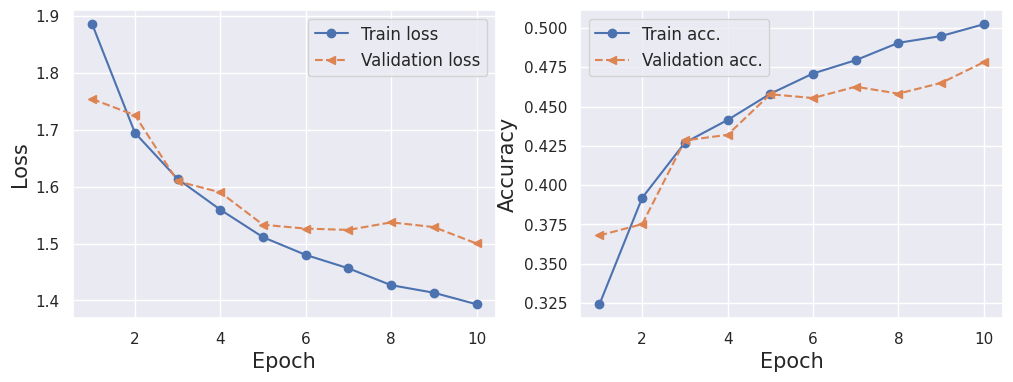

In [11]:
hist = history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [12]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.4726 - accuracy: 0.4771

Test Acc. 47.71%


### Build CNN Model

In [13]:
def build_cnn_model(n_classes,
                hidden_layer_sizes=[256, 128, 64],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
    
  model.add(keras.layers.Conv2D(filters = 32, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [14]:
model = build_cnn_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=10,
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/10
704/704 [==============================] - 10s 5ms/step - loss: 1.5386 - accuracy: 0.4406 - val_loss: 1.3048 - val_accuracy: 0.5302
Epoch 2/10
704/704 [==============================] - 3s 4ms/step - loss: 1.2074 - accuracy: 0.5716 - val_loss: 1.1309 - val_accuracy: 0.6052
Epoch 3/10
704/704 [==============================] - 3s 4ms/step - loss: 1.0636 - accuracy: 0.6256 - val_loss: 1.0477 - val_accuracy: 0.6362
Epoch 4/10
704/704 [==============================] - 3s 4ms/step - loss: 0.9649 - accuracy: 0.6597 - val_loss: 0.9958 - val_accuracy: 0.6552
Epoch 5/10
704/704 [==============================] - 3s 4ms/step - loss: 0.8864 - accuracy: 0.6875 - val_loss: 0.9389 - val_accuracy: 0.6820
Epoch 6/10
704/704 [==============================] - 3s 4ms/step - loss: 0.8123 - accuracy: 0.7155 - val_loss: 0.9807 - val_accuracy: 0.6594
Epoch 7/10
704/704 [==============================] - 3s 4ms/step - loss: 0.7495 - accuracy: 0.7366 - val_loss: 0.8958 - val_accuracy: 0.6902
Epoch

,loss,accuracy,val_loss,val_accuracy
0,1.538606,0.440578,1.304767,0.5302
1,1.207394,0.571556,1.130923,0.6052
2,1.063636,0.625578,1.047740,0.6362
3,0.964921,0.659689,0.995807,0.6552
4,0.886363,0.687489,0.938917,0.6820
5,0.812253,0.715511,0.980725,0.6594
6,0.749479,0.736622,0.895816,0.6902
7,0.686999,0.758200,0.850230,0.7094
8,0.628979,0.777000,0.877451,0.7090
9,0.576416,0.796133,0.906912,0.7034


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

### Plot CNN Model Training & Validation Accuracy

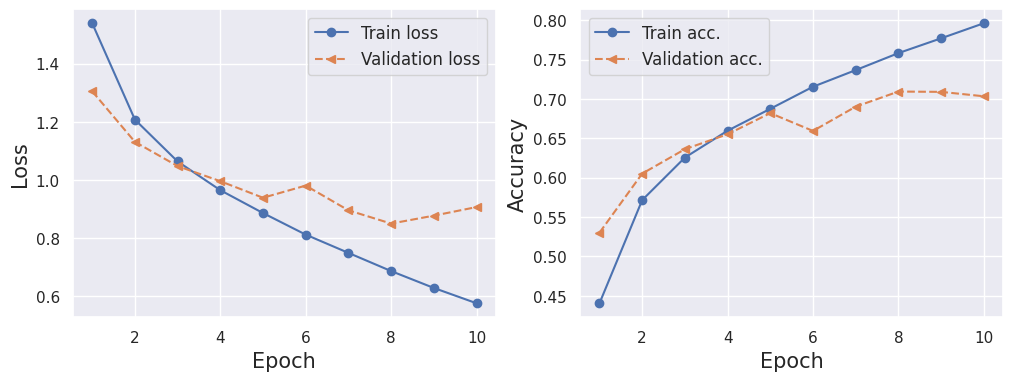

In [15]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [16]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.9184 - accuracy: 0.7004

Test Acc. 70.04%


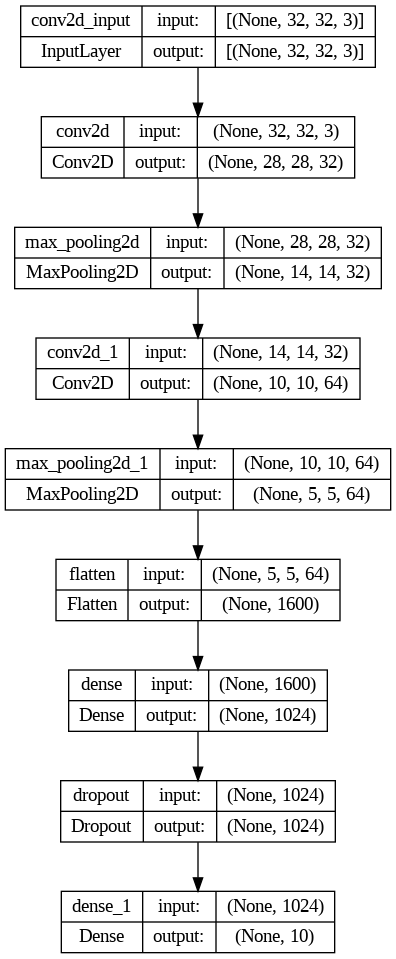

In [17]:
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

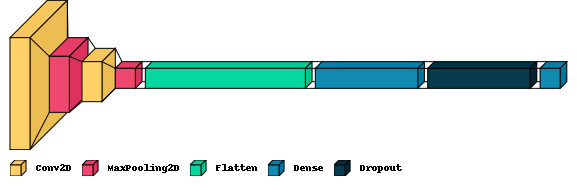

In [18]:
visualkeras.layered_view(model, legend=True)

### Build CNN Model #2

In [19]:
def build_cnn_model_2(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()

  model.add(keras.layers.Conv2D(filters = 32, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))  
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  #model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Conv2D(filters = 32, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  #model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [20]:
model = build_cnn_model_2(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024, 1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=15, #can we train a bit longer
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/20
704/704 [==============================] - 12s 13ms/step - loss: 1.6967 - accuracy: 0.3712 - val_loss: 1.3867 - val_accuracy: 0.4958
Epoch 2/20
704/704 [==============================] - 9s 12ms/step - loss: 1.3354 - accuracy: 0.5201 - val_loss: 1.2209 - val_accuracy: 0.5644
Epoch 3/20
704/704 [==============================] - 9s 12ms/step - loss: 1.1796 - accuracy: 0.5816 - val_loss: 1.0818 - val_accuracy: 0.6212
Epoch 4/20
704/704 [==============================] - 9s 13ms/step - loss: 1.0689 - accuracy: 0.6212 - val_loss: 0.9847 - val_accuracy: 0.6526
Epoch 5/20
704/704 [==============================] - 9s 12ms/step - loss: 0.9711 - accuracy: 0.6585 - val_loss: 0.8999 - val_accuracy: 0.6856
Epoch 6/20
704/704 [==============================] - 9s 12ms/step - loss: 0.9143 - accuracy: 0.6798 - val_loss: 0.8885 - val_accuracy: 0.6936
Epoch 7/20
704/704 [==============================] - 9s 12ms/step - loss: 0.8576 - accuracy: 0.6973 - val_loss: 0.9637 - val_accuracy: 0.666

,loss,accuracy,val_loss,val_accuracy
0,1.696672,0.371178,1.386680,0.4958
1,1.335397,0.520111,1.220921,0.5644
2,1.179634,0.581578,1.081764,0.6212
3,1.068898,0.621156,0.984746,0.6526
4,0.971120,0.658489,0.899866,0.6856
5,0.914283,0.679778,0.888462,0.6936
6,0.857591,0.697311,0.963745,0.6668
7,0.809112,0.715267,0.798476,0.7256
8,0.773377,0.727111,0.822486,0.7190
9,0.733023,0.741822,0.813707,0.7190


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        51264     
                                                        

### Plot CNN Model 2 Training & Validation Accuracy

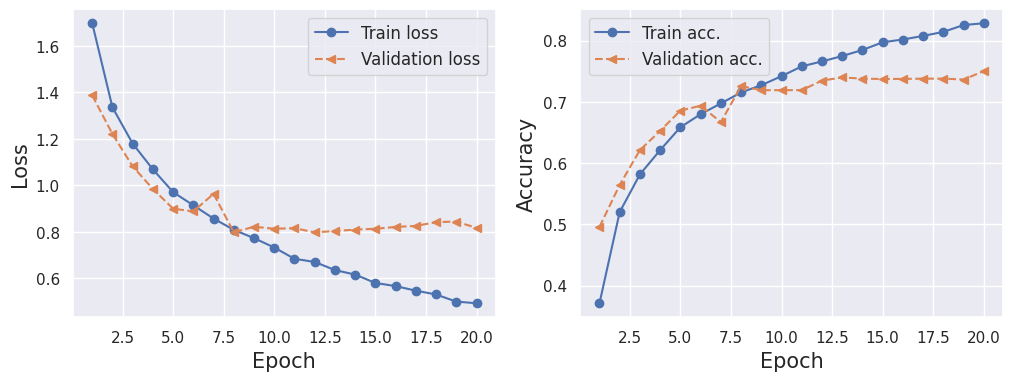

In [21]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [22]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.8585 - accuracy: 0.7385

Test Acc. 73.85%


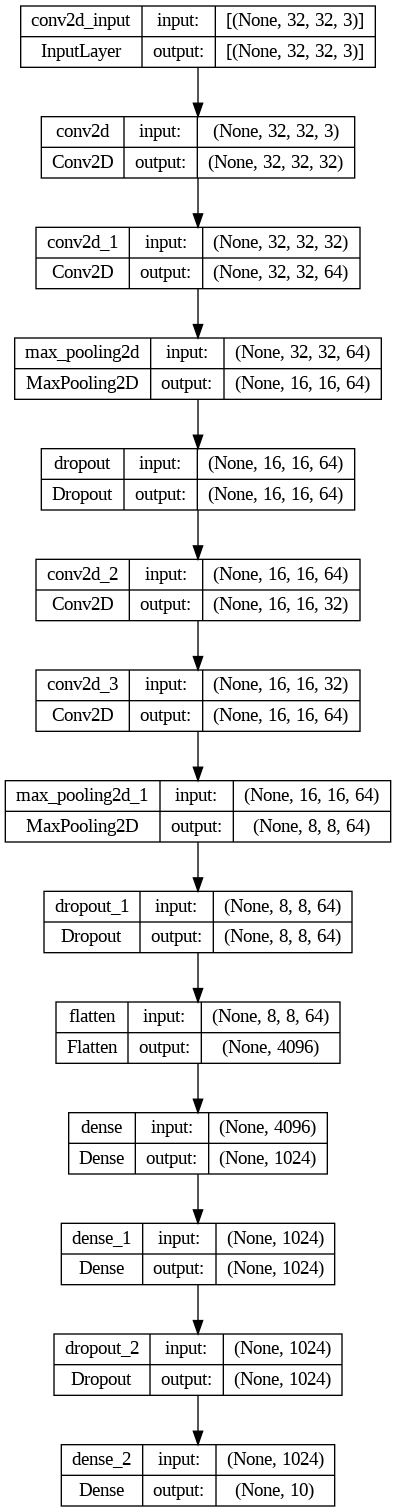

In [23]:
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

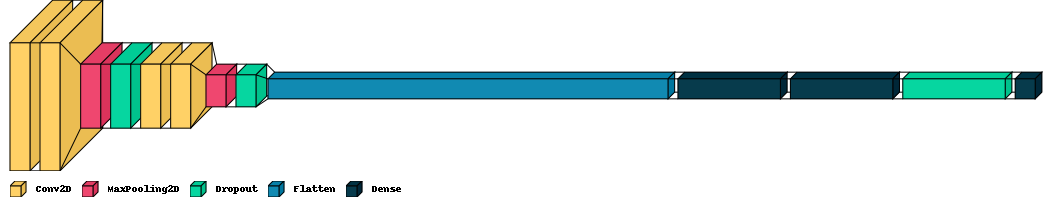

In [24]:
visualkeras.layered_view(model, legend=True)

### Build CNN Model 3 With Batch Normalization

In [25]:
def build_cnn_model_3(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()

  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Conv2D(filters = 128, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 128, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Conv2D(filters = 256, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 256, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [26]:
model = build_cnn_model_3(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024, 1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=15, 
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/15
704/704 [==============================] - 32s 37ms/step - loss: 1.6874 - accuracy: 0.4102 - val_loss: 1.7495 - val_accuracy: 0.4154
Epoch 2/15
704/704 [==============================] - 25s 36ms/step - loss: 1.1354 - accuracy: 0.6001 - val_loss: 1.0903 - val_accuracy: 0.6406
Epoch 3/15
704/704 [==============================] - 25s 36ms/step - loss: 0.8999 - accuracy: 0.6932 - val_loss: 0.8842 - val_accuracy: 0.6984
Epoch 4/15
704/704 [==============================] - 25s 36ms/step - loss: 0.7654 - accuracy: 0.7401 - val_loss: 0.8653 - val_accuracy: 0.7144
Epoch 5/15
704/704 [==============================] - 25s 36ms/step - loss: 0.6697 - accuracy: 0.7742 - val_loss: 0.8609 - val_accuracy: 0.7342
Epoch 6/15
704/704 [==============================] - 25s 36ms/step - loss: 0.5924 - accuracy: 0.8023 - val_loss: 0.7598 - val_accuracy: 0.7590
Epoch 7/15
704/704 [==============================] - 25s 36ms/step - loss: 0.5212 - accuracy: 0.8243 - val_loss: 0.6584 - val_accuracy:

,loss,accuracy,val_loss,val_accuracy
0,1.687431,0.410156,1.749488,0.4154
1,1.135399,0.600133,1.090331,0.6406
2,0.899915,0.693244,0.884158,0.6984
3,0.765350,0.740089,0.865317,0.7144
4,0.669665,0.774178,0.860894,0.7342
5,0.592363,0.802267,0.759760,0.7590
6,0.521198,0.824267,0.658353,0.7918
7,0.471375,0.840844,0.699638,0.7712
8,0.420188,0.860311,0.587105,0.8218
9,0.377004,0.871733,0.792050,0.7802


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

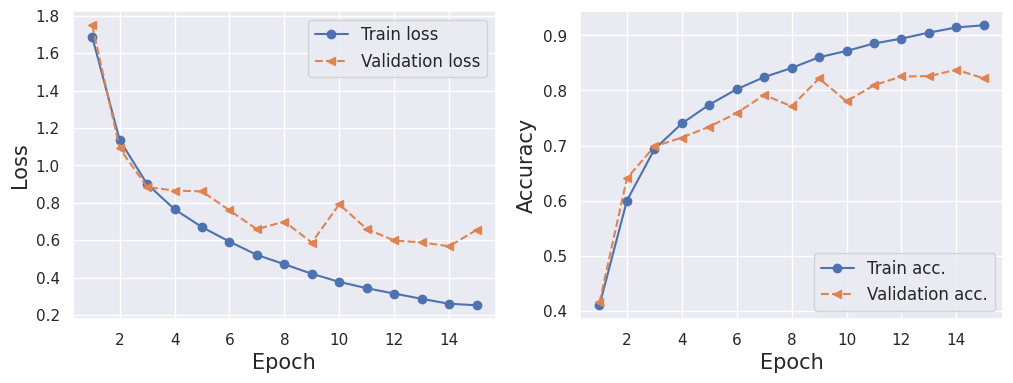

In [27]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [28]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 2s 7ms/step - loss: 0.7153 - accuracy: 0.8165

Test Acc. 81.65%


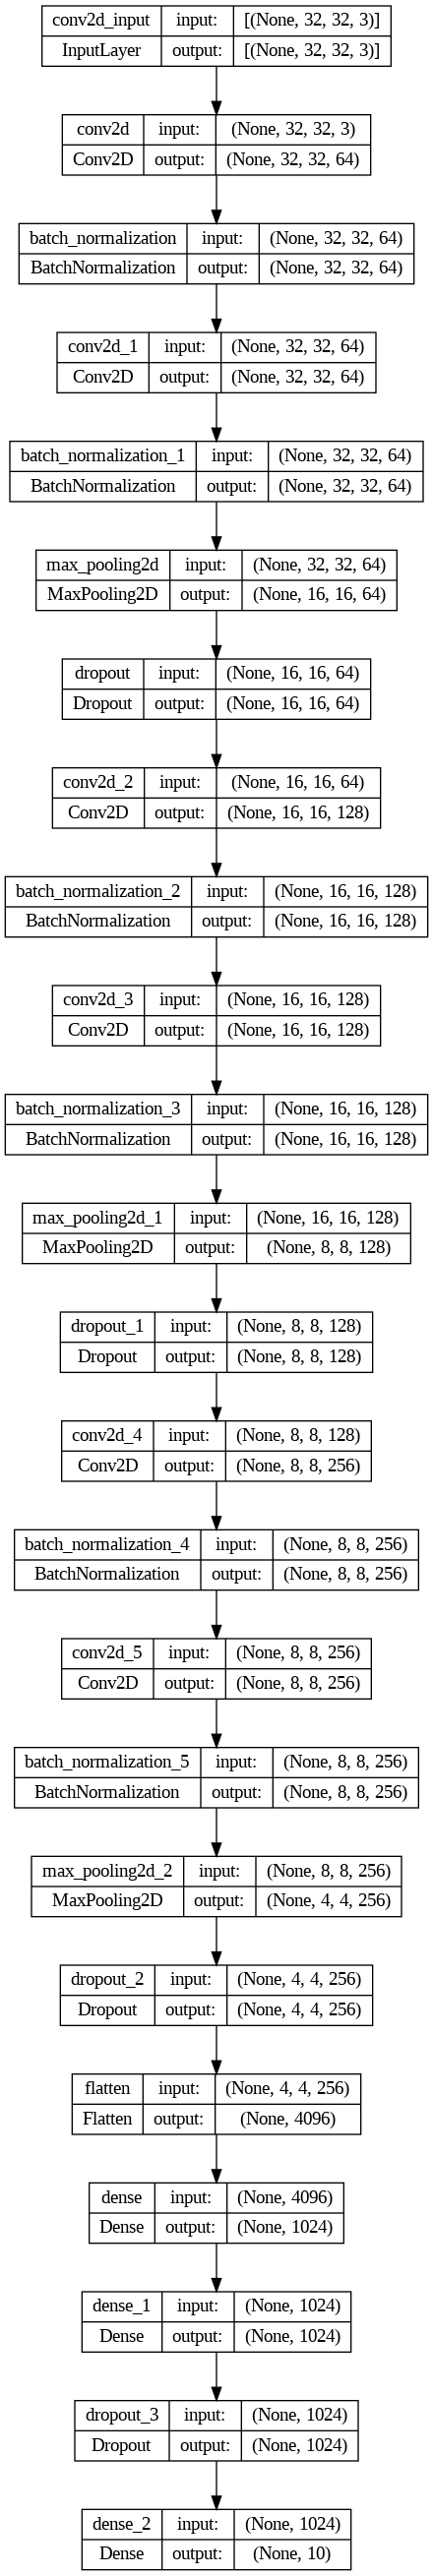

In [29]:
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

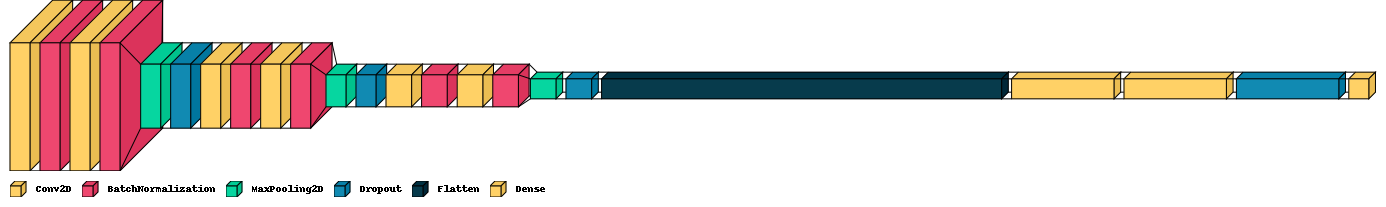

In [30]:
visualkeras.layered_view(model, legend=True)

### Evaluate CNN Model Precision and Accuracy Metrics by Label

In [31]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 2s 5ms/step
[3 8 8 ... 5 1 7]


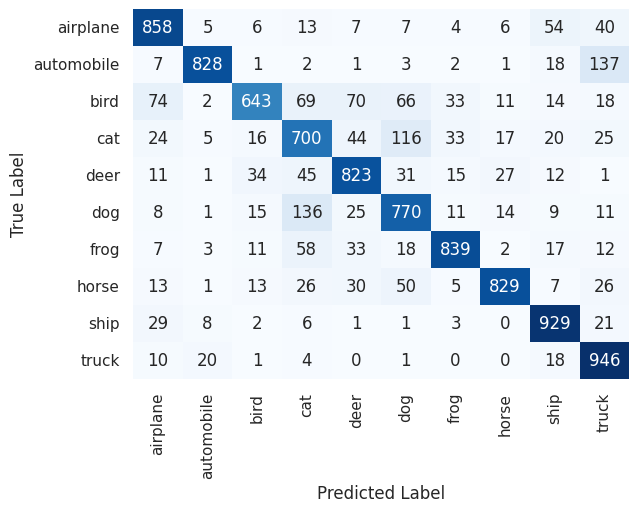

In [32]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [33]:
# Calculate Precision: TP / (TP+FP) ~ divide the true positives for each label by the sum down the columns (axis=0) 
for i in range(10):
    print(label_names[i], "\t", confusion_matrix[(i,i)]/tf.reduce_sum(confusion_matrix,0)[i])

airplane 	 tf.Tensor(0.8242074927953891, shape=(), dtype=float64)
automobile 	 tf.Tensor(0.9473684210526315, shape=(), dtype=float64)
bird 	 tf.Tensor(0.866576819407008, shape=(), dtype=float64)
cat 	 tf.Tensor(0.6610009442870632, shape=(), dtype=float64)
deer 	 tf.Tensor(0.7959381044487428, shape=(), dtype=float64)
dog 	 tf.Tensor(0.7243650047036688, shape=(), dtype=float64)
frog 	 tf.Tensor(0.8878306878306879, shape=(), dtype=float64)
horse 	 tf.Tensor(0.9140022050716649, shape=(), dtype=float64)
ship 	 tf.Tensor(0.8460837887067395, shape=(), dtype=float64)
truck 	 tf.Tensor(0.7647534357316087, shape=(), dtype=float64)


In [1]:
print("label names:", label_names,"\n")
x_test_1 = x_test[np.logical_and(y_test==3, test_predictions==5)] #true label = 'bird', predicted label = 'deer'
x_test_2 = x_test[np.logical_and(y_test==5, test_predictions==3)] #true label = 'dog', predicted label = 'cat'

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
for i in range(5):
  axs[i].imshow(x_test_1[i], cmap='gray')
  axs[i].set_title("True:" + label_names[3] + "|Pred:" + label_names[5])
  axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
for i in range(5):
  axs[i].imshow(x_test_2[i], cmap='gray')
  axs[i].set_title("True:" + label_names[5] + "|Pred:" + label_names[3])
  axs[i].axis('off')
plt.show()

NameError: ignored

### Visualize CNN Model Learning At Each Layer

Shape of image: (1, 32, 32, 3)


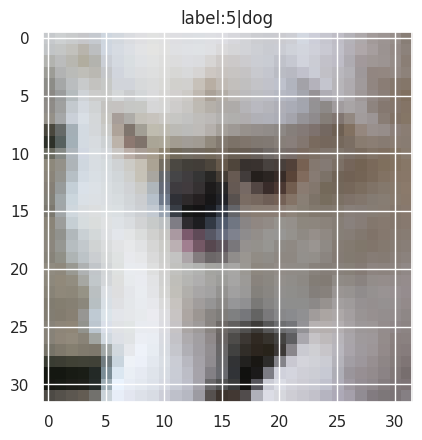

In [35]:
#Pick an example from our training data to view how our model learns the image by layer
img_tensor = np.expand_dims(x_train[2], axis = 0)

# Print image tensor shape
print('Shape of image:', img_tensor.shape);
  
# Print image
plt.imshow(img_tensor[0]);
plt.title('label:' + str(y_train[1])+"|"+label_names[y_train[1]])
plt.show()

1/1 [==============================] - 0s 140ms/step
----------------
Geeting activations of layer 1 : conv2d
Images size is 32 x 32
Number of channels is 64
Printing channels:


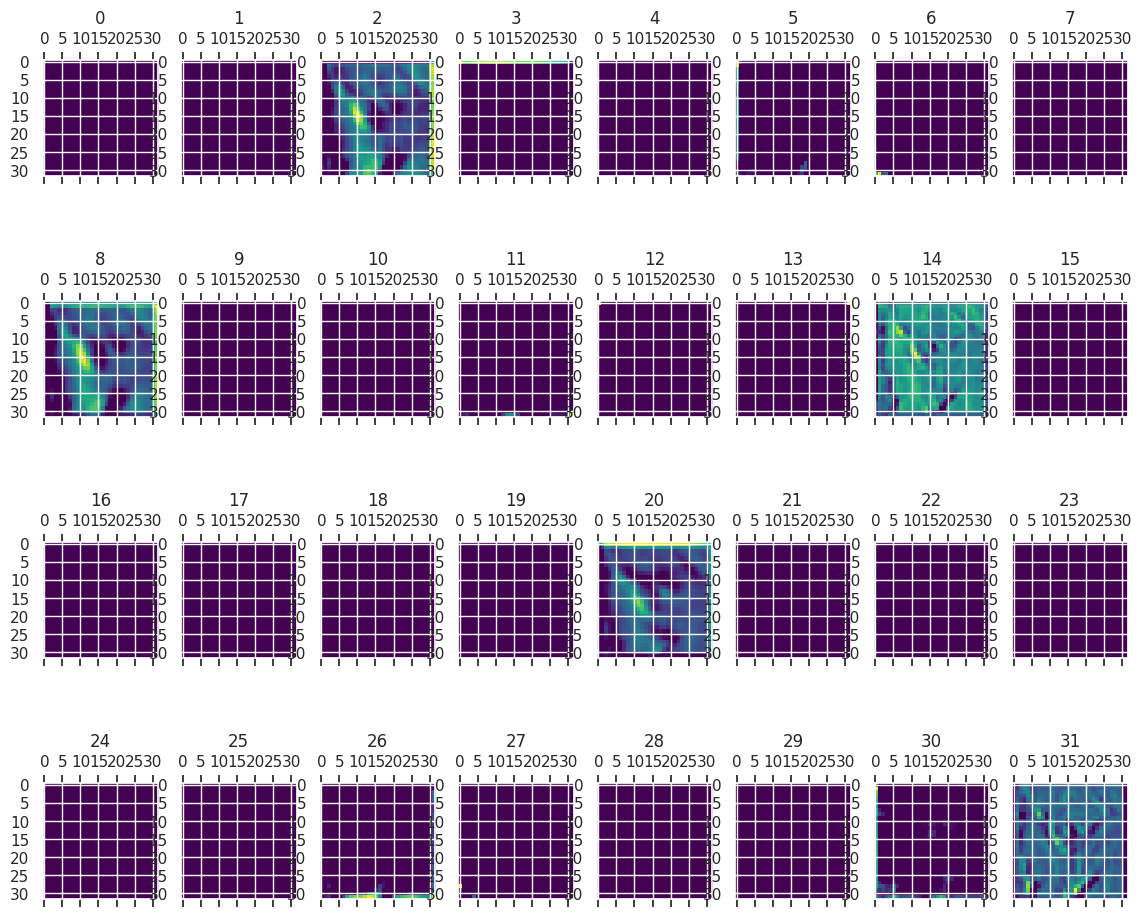

----------------
Geeting activations of layer 2 : batch_normalization
Images size is 32 x 32
Number of channels is 64
Printing channels:


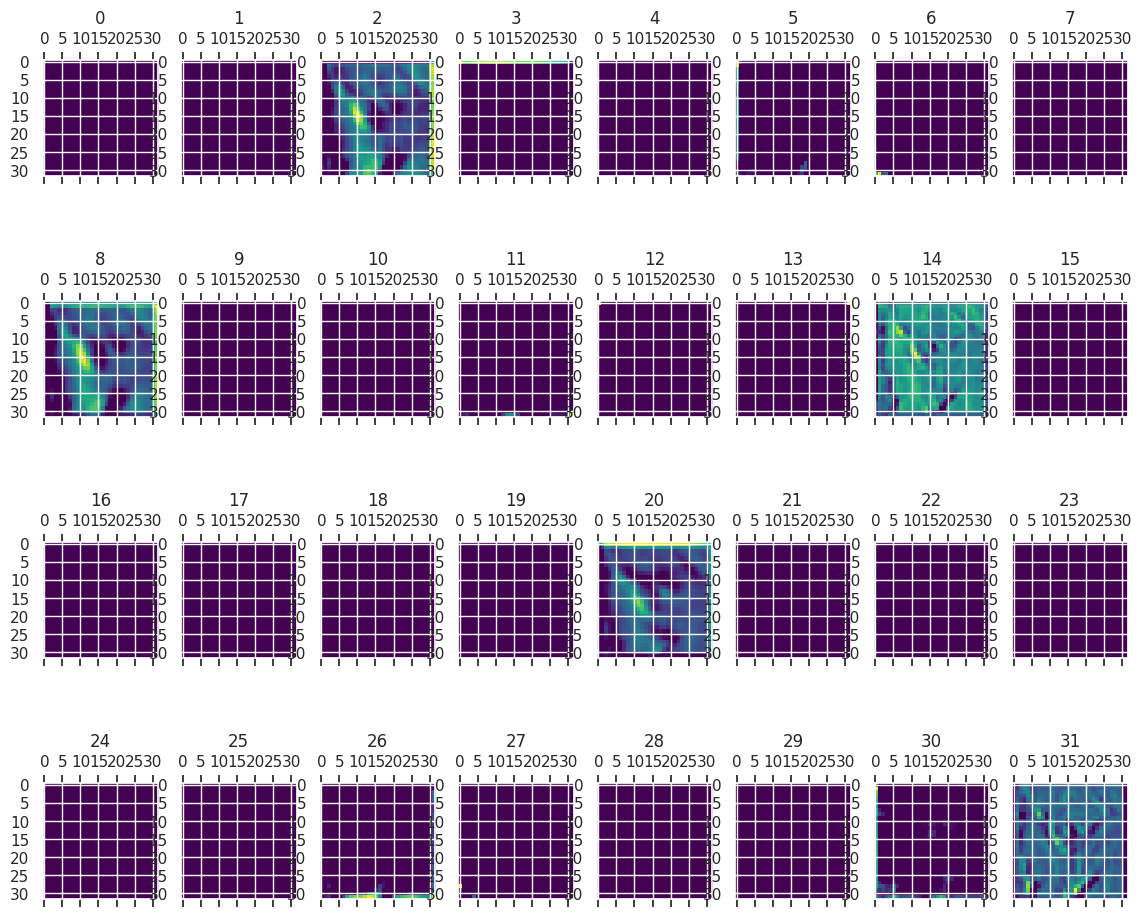

----------------
Geeting activations of layer 3 : conv2d_1
Images size is 32 x 32
Number of channels is 64
Printing channels:


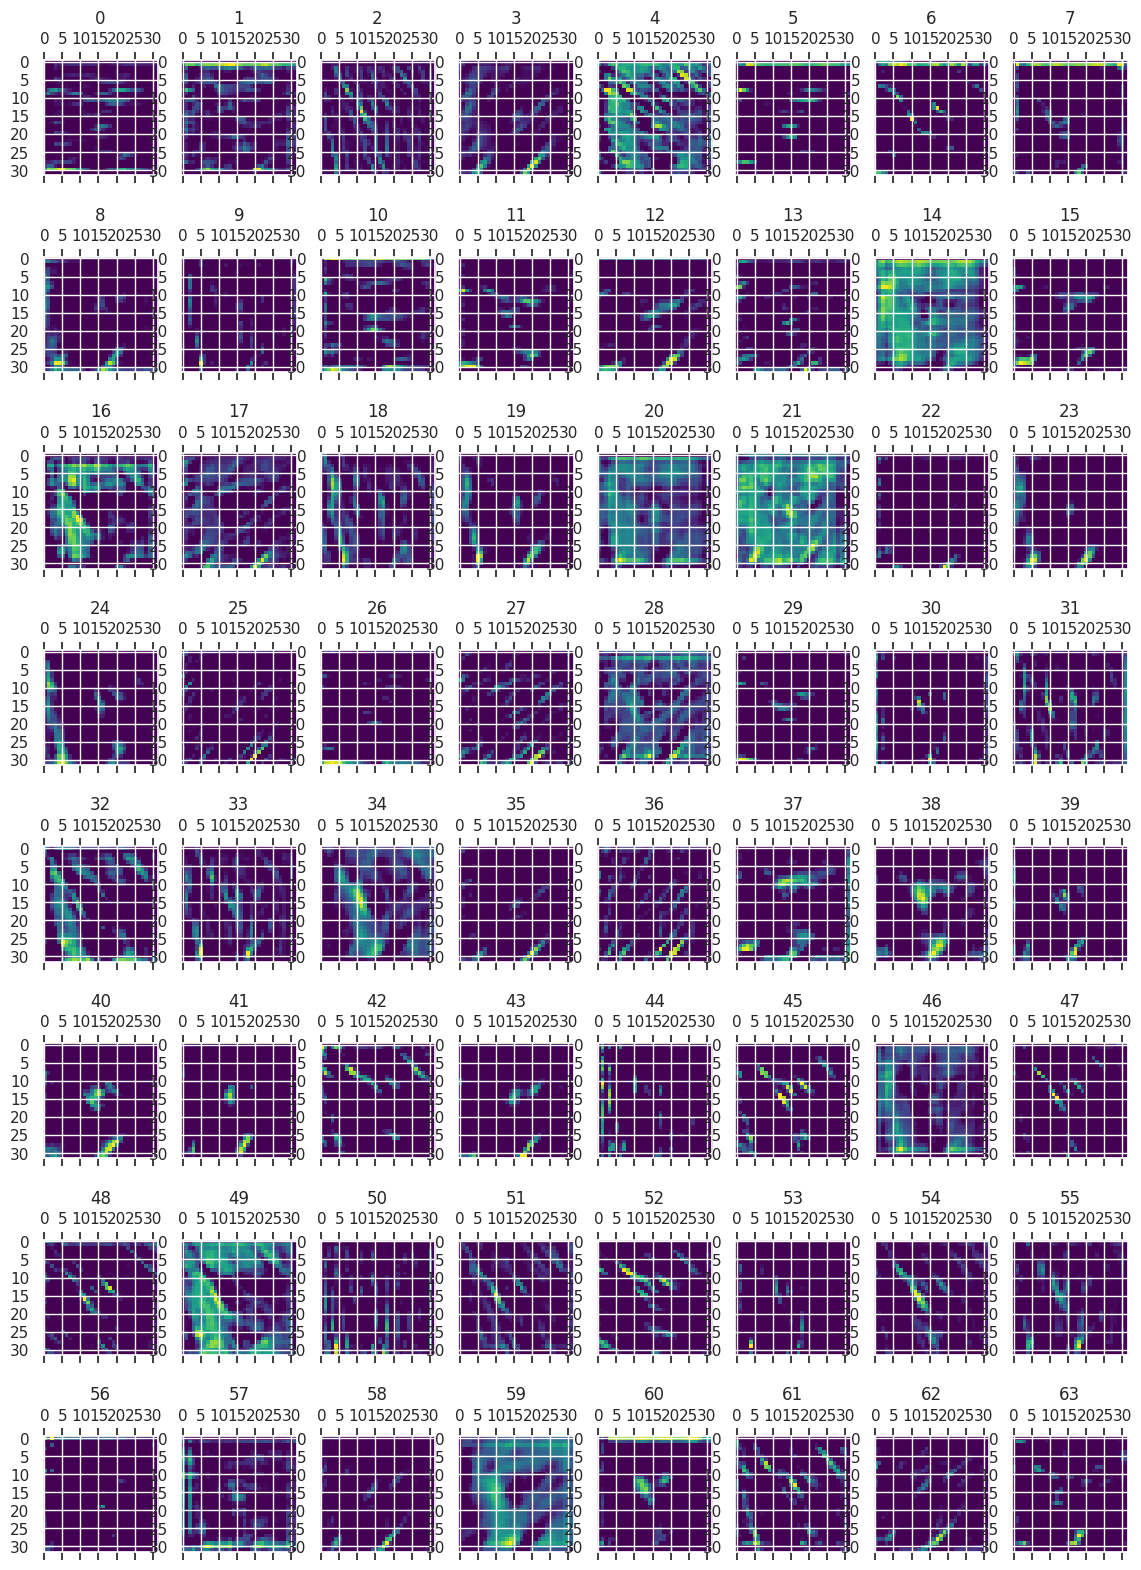

----------------
Geeting activations of layer 4 : batch_normalization_1
Images size is 32 x 32
Number of channels is 64
Printing channels:


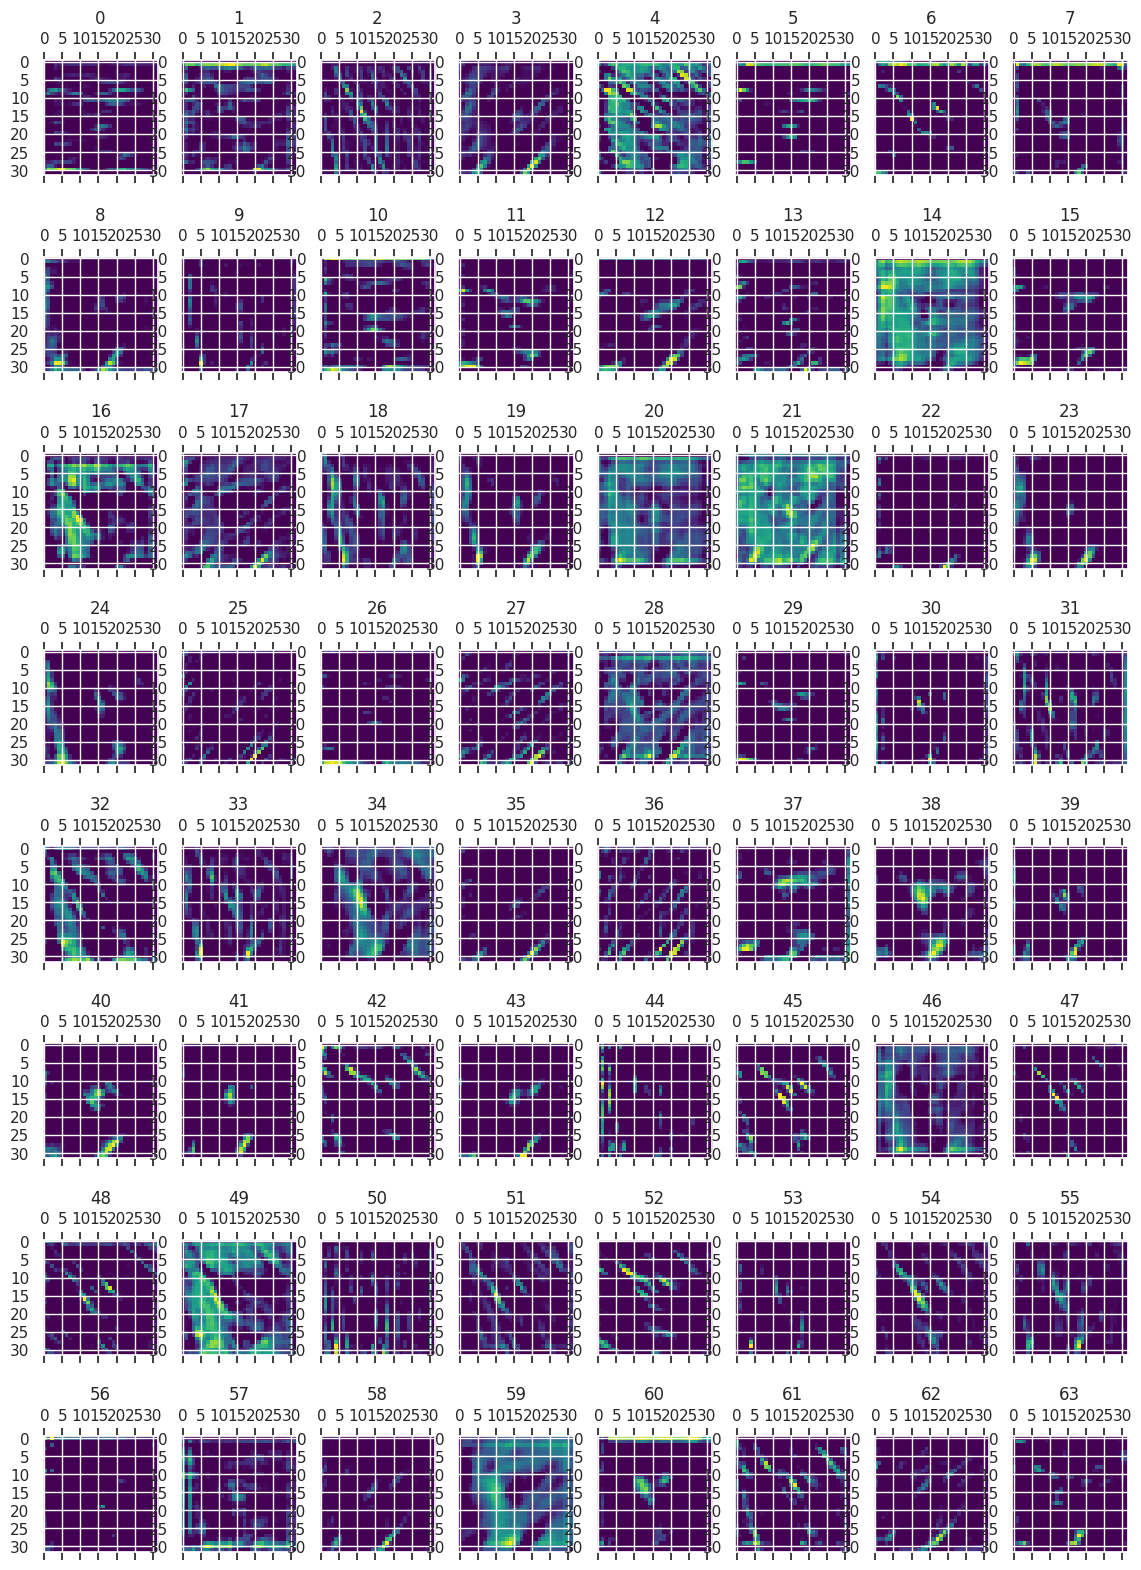

In [36]:
# outputs of the first 4 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

# grab layer names
layer_names = []
for layer in model.layers[:4]:
    layer_names.append(layer.name)

# getting activations of each layer
for idx, layer in enumerate(activations):
    if idx in (0,1,2,3):
        print('----------------')
        print('Geeting activations of layer',  idx+1, ':', layer_names[idx])
        activation = layer

        # shape of layer activation
        print('Images size is', activation.shape[1], 'x', activation.shape[2])
        print('Number of channels is', activation.shape[3])

        # print channels
        print('Printing channels:')
        
        # define nrows and ncols depending on number of channels
        if idx in (0,1):
            nrows, ncols = 4,8
        if idx in (2,3):
            nrows, ncols = 8,8

        # plots
        channel=0
        if idx in (0,1):
            f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
        if idx in (2,3):
            f, axs = plt.subplots(nrows, ncols, figsize=(14,20))
            
        for i in range(nrows):
            for j in range(ncols):
                if i==0 and j==0:
                    channel=0
                else:
                    channel+=1

                axs[i,j].matshow(activation[0,:, :, channel], cmap ='viridis')
                axs[i,j].set(title=str(channel))
                #axs[i,j].axis('off') # pay attention to the range of x and y axis
        plt.show()